In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/annotated_data.csv')
print(f'shape={df.shape}')
df.head()

shape=(2697, 4)


,Unnamed: 0,supplier_name,Product_Designation,category
0,0,,ILP P20,Utilities
1,1,,ILP M35,Utilities
2,2,,ILP N18,Utilities
3,3,,ILP N24,Utilities
4,4,,ILP N28,Utilities


In [3]:
print(f"Number of annotated rows = {sum(df['category'].str.len()>1)}")

Number of annotated rows = 2269


In [4]:
# only keep labeled rows
df=df[df['category'].str.len()>1]
df

,Unnamed: 0,supplier_name,Product_Designation,category
0,0,,ILP P20,Utilities
1,1,,ILP M35,Utilities
2,2,,ILP N18,Utilities
3,3,,ILP N24,Utilities
4,4,,ILP N28,Utilities
...,...,...,...,...
2692,2692,*STEAL-IMEN,LAVE VAISSELLE 6L CITRON VERT,Household Items/Supplies
2693,2693,*STEAL-IMEN,DINOLL CITRON SL,Household Items/Supplies
2694,2694,*STEAL-IMEN,DINOLL CITRON VERT 5L,Household Items/Supplies
2695,2695,*STEAL-IMEN,DINOLL POMME 3L,Household Items/Supplies


/home/maher/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


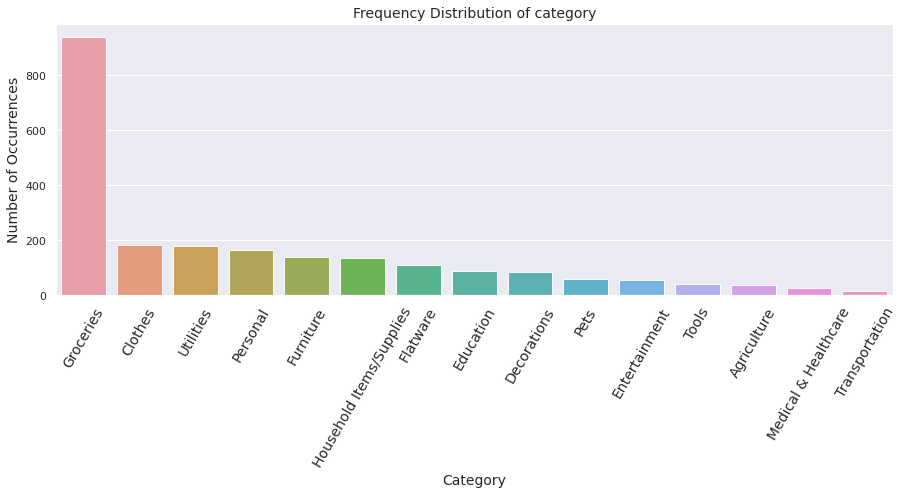

In [5]:
category_count = df['category'].value_counts()
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot( category_count.index, category_count.values, alpha=0.9)
plt.title('Frequency Distribution of category',fontsize=14)
plt.ylabel('Number of Occurrences',fontsize=14)
plt.xticks(size='small',rotation=60,fontsize=14)
plt.xlabel('Category', fontsize=14)
plt.show()


In [6]:
nbr_categ = len(df['category'].unique())
print(f"number of categories={nbr_categ}")

df['category'].unique()

number of categories=15


array(['Utilities', 'Groceries', 'Household Items/Supplies', 'Clothes',
       'Furniture', 'Personal', 'Flatware', 'Education', 'Agriculture',
       'Transportation', 'Entertainment', 'Decorations', 'Tools',
       'Medical & Healthcare', 'Pets'], dtype=object)

In [7]:
df['category'].value_counts()

Groceries                   940
Clothes                     183
Utilities                   181
Personal                    163
Furniture                   141
Household Items/Supplies    137
Flatware                    110
Education                    90
Decorations                  85
Pets                         59
Entertainment                55
Tools                        43
Agriculture                  38
Medical & Healthcare         27
Transportation               17
Name: category, dtype: int64

## Text preprocessing

In [8]:
# !pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git &> /dev/null

In [11]:
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/maher/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/maher/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /home/maher/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /home/maher/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import re
from spellchecker import SpellChecker

import nltk
nltk.download('stopwords')
nltk.download('punkt')
french_stopwords = nltk.corpus.stopwords.words('french')
french_stopwords.remove('l') # litre

from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer
lemmatizer = FrenchLefffLemmatizer()


def clean_text(text):
    """
    Applies some pre-processing on the given text
    """
    
    # convert text to lowercase
    text = text.lower()

    # remove numbers, symbols and punctuation
    text = re.sub(r"[^A-Za-z]", " ", text)

    # remove leading whitespaces
    text = text.strip()

    # remove stop words
    tokenize_sentence = nltk.tokenize.word_tokenize(text)
    words_w_stopwords = [i for i in tokenize_sentence if i not in french_stopwords]

    # lemitization
    words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)
    text = ' '.join(w for w in words_lemmatize)

    # spell check
    #spell = SpellChecker(language='fr')
    #text = spell.correction(text)

    return text

In [4]:
df['Product_Designation']=[clean_text(str(text)) for text in df['Product_Designation']]
df['supplier_name']=[clean_text(str(text)) for text in df['supplier_name']]
df

,Unnamed: 0,supplier_name,Product_Designation,category
0,0,,ilp p,Utilities
1,1,,ilp,Utilities
2,2,,ilp,Utilities
3,3,,ilp,Utilities
4,4,,ilp,Utilities
...,...,...,...,...
2692,2692,steal imen,lave vaisselle citron vert,Household Items/Supplies
2693,2693,steal imen,dinoll citron sl,Household Items/Supplies
2694,2694,steal imen,dinoll citron vert,Household Items/Supplies
2695,2695,steal imen,dinoll pomme,Household Items/Supplies


In [18]:
df['full_designation']=[df['Product_Designation'].values[i]+" "+df['supplier_name'].values[i] for i in range(df.shape[0])]
df['full_designation']

0                                      ilp p 
1                                        ilp 
2                                        ilp 
3                                        ilp 
4                                        ilp 
                        ...                  
2692    lave vaisselle citron vert steal imen
2693              dinoll citron sl steal imen
2694            dinoll citron vert steal imen
2695                  dinoll pomme steal imen
2696                         javel steal imen
Name: full_designation, Length: 2269, dtype: object

In [19]:
X=df[['supplier_name','Product_Designation']]
y=df['category']

from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(y)

In [64]:
label_map = dict(zip(lbl_enc.transform(lbl_enc.classes_),lbl_enc.classes_))

class_names = []
for categ in label_map.values():
    class_names.append(categ)

label_map

{0: 'Agriculture',
 1: 'Clothes',
 2: 'Decorations',
 3: 'Education',
 4: 'Entertainment',
 5: 'Flatware',
 6: 'Furniture',
 7: 'Groceries',
 8: 'Household Items/Supplies',
 9: 'Medical & Healthcare',
 10: 'Personal',
 11: 'Pets',
 12: 'Tools',
 13: 'Transportation',
 14: 'Utilities'}

## TF-IDF embedding

In [21]:
corpus=df['full_designation'].values.tolist()

In [22]:
words=set()
for i in range(X.shape[0]):
    name = X['Product_Designation'].values[i]
    for word in name.split():
        words.add(word)
    supplier = X['supplier_name'].values[i]
    for word in supplier.split():
        words.add(word)
print(f'number of unique words={len(words)}')

number of unique words=3323


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    max_features=1000,
    min_df=3, 
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 1),
    use_idf=1,
    smooth_idf=1,
    sublinear_tf=1
)

mat=vectorizer.fit_transform(corpus).toarray()
features = vectorizer.get_feature_names()
print(len(vectorizer.get_feature_names()))

1000


In [24]:
# top 50 features
indices = np.argsort(vectorizer.idf_)[::-1]
top_features = [features[i] for i in indices[:50]]
print(top_features)

['kenya', 'huawei', 'gaufrette', 'smart', 'gh', 'sl', 'gouda', 'gpbisbaho', 'grp', 'halkhoum', 'haltere', 'harissa', 'hotte', 'ide', 'tamarat', 'ifrikia', 'in', 'installation', 'seche', 'isolante', 'istri', 'it', 'jebba', 'jour', 'joy', 'jupe', 'soap', 'ft', 'frost', 'socodal', 'dct', 'tabi', 'del', 'demelant', 'depilatoire', 'detice', 'dev', 'dfc', 'divers', 'stella', 'standard', 'epsilon', 'ss', 'square', 'speaker', 'pet', 'sonia', 'forest', 'foska', 'fr']


In [25]:
import pickle
pickle.dump(vectorizer, open('./dumps/vectorizer.pkl', "wb"))

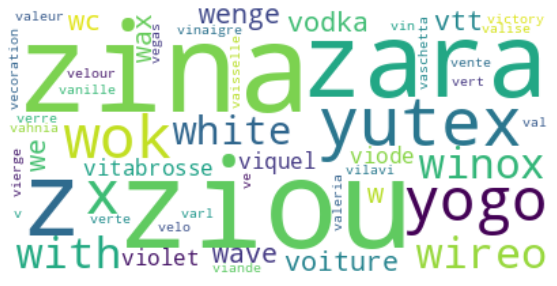

In [26]:
from wordcloud import WordCloud
x = vectorizer.vocabulary_
Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(x)
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Models Evaluation & Comparaison

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(mat,y,test_size=0.2,stratify=y)
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
def modelEvaluation(model):
    """
    fits the given model on the data and evaluates it's prediction performance
    """
    
    # Training the classifier & predicting on test data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Classification metrics
    from sklearn.metrics import accuracy_score, classification_report
    classification_report = classification_report(y_val, y_pred)

    score = accuracy_score(y_val, y_pred)
    print('\n Accuracy: ', score)
    print('\nClassification Report')
    print('======================================================')
    print('\n', classification_report)

    return score

### 1 - MultinomialNB

In [34]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
MultiNB_score = modelEvaluation(model)


 Accuracy:  0.7973568281938326

Classification Report

               precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       1.00      0.92      0.96        37
           2       1.00      0.88      0.94        17
           3       1.00      0.83      0.91        18
           4       1.00      0.55      0.71        11
           5       0.92      0.50      0.65        22
           6       0.69      0.86      0.76        28
           7       0.73      0.98      0.84       188
           8       0.71      0.56      0.63        27
           9       1.00      0.20      0.33         5
          10       1.00      0.61      0.75        33
          11       0.83      0.42      0.56        12
          12       1.00      0.22      0.36         9
          13       1.00      0.33      0.50         3
          14       0.83      0.67      0.74        36

    accuracy                           0.80       454
   macro avg       0.91

### 2 - XGB classifier

In [66]:
import xgboost as xgb
model = xgb.XGBClassifier()
XGBC_score = modelEvaluation(model)

/home/maher/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:14:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Accuracy:  0.8590308370044053

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.94      0.78      0.85        37
           2       0.94      0.88      0.91        17
           3       0.94      0.89      0.91        18
           4       1.00      1.00      1.00        11
           5       0.73      0.86      0.79        22
           6       0.88      0.79      0.83        28
           7       0.85      0.94      0.89       188
           8       0.83      0.74      0.78        27
           9       1.00      1.00      1.00         5
          10       0.96      0.70      0.81        33
          11       0.77      0.83      0.

### 3 - Support Vector Machine

In [36]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
SVM_score = modelEvaluation(model)


 Accuracy:  0.8986784140969163

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.94      0.89      0.92        37
           2       0.83      0.88      0.86        17
           3       0.94      0.94      0.94        18
           4       1.00      1.00      1.00        11
           5       1.00      0.77      0.87        22
           6       0.89      0.89      0.89        28
           7       0.90      0.96      0.93       188
           8       0.82      0.85      0.84        27
           9       1.00      1.00      1.00         5
          10       0.81      0.79      0.80        33
          11       0.86      1.00      0.92        12
          12       1.00      0.67      0.80         9
          13       1.00      1.00      1.00         3
          14       0.87      0.75      0.81        36

    accuracy                           0.90       454
   macro avg       0.93

### 4 - Logistic regression

In [37]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
LR_score = modelEvaluation(model)


 Accuracy:  0.8986784140969163

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.94      0.89      0.92        37
           2       0.83      0.88      0.86        17
           3       0.94      0.94      0.94        18
           4       1.00      1.00      1.00        11
           5       1.00      0.77      0.87        22
           6       0.89      0.89      0.89        28
           7       0.90      0.96      0.93       188
           8       0.82      0.85      0.84        27
           9       1.00      1.00      1.00         5
          10       0.81      0.79      0.80        33
          11       0.86      1.00      0.92        12
          12       1.00      0.67      0.80         9
          13       1.00      1.00      1.00         3
          14       0.87      0.75      0.81        36

    accuracy                           0.90       454
   macro avg       0.93

In [38]:
pickle.dump(model, open('./dumps/model.pkl', 'wb'))

In [39]:
d={
   'MultinomialNB':MultiNB_score,
   'XGB classifier':XGBC_score,
   'SVM':SVM_score,
   'Logistic Reg':LR_score
}

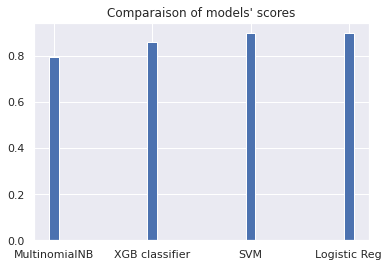

In [40]:
plt.figure(figsize=[6,4])

plt.bar(range(len(d)), list(d.values()), align='center', width=0.1)
plt.xticks(range(len(d)), list(d.keys()))

plt.title("Comparaison of models' scores")
plt.show()

### New item classification

In [42]:
item=corpus[15:16]
item=np.array(["telephone huawei y7 2019"],dtype=object)

r=vectorizer.fit(corpus)
test_pred=r.transform(item).toarray()

label_map[model.predict(test_pred)[0]]

'Utilities'

### Neural network approach

In [43]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


### One hot encoding

In [45]:
from keras.utils.np_utils import to_categorical

y_train_enc = to_categorical(y_train)
y_val_enc = to_categorical(y_val)

print(y_train_enc)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Model

In [46]:
model = Sequential([
    Dense(512, input_shape=(len(X_train[0]),)),
    Activation('relu'),
    
    Dropout(0.4),
    
    Dense(units=nbr_categ),
    Activation('softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               512512    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                7695      
_________________________________________________________________
activation_1 (Activation)    (None, 15)                0         
Total params: 520,207
Trainable params: 520,207
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [48]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [49]:
history = model.fit(
    X_train, y_train_enc,
    batch_size=32,
    epochs=500,
    verbose=1,
    validation_data=(X_val,y_val_enc),
    callbacks=[early_stop]
)

Epoch 1/500
57/57 [==============================] - 19s 14ms/step - loss: 2.5118 - accuracy: 0.3331 - val_loss: 1.7930 - val_accuracy: 0.4141
Epoch 2/500
57/57 [==============================] - 0s 5ms/step - loss: 1.6172 - accuracy: 0.4272 - val_loss: 1.2251 - val_accuracy: 0.6013
Epoch 3/500
57/57 [==============================] - 1s 10ms/step - loss: 1.0008 - accuracy: 0.7364 - val_loss: 0.7216 - val_accuracy: 0.8282
Epoch 4/500
57/57 [==============================] - 1s 11ms/step - loss: 0.5167 - accuracy: 0.9130 - val_loss: 0.4707 - val_accuracy: 0.8789
Epoch 5/500
57/57 [==============================] - 1s 12ms/step - loss: 0.3074 - accuracy: 0.9466 - val_loss: 0.3638 - val_accuracy: 0.9207
Epoch 6/500
57/57 [==============================] - 1s 10ms/step - loss: 0.2107 - accuracy: 0.9607 - val_loss: 0.3160 - val_accuracy: 0.9317
Epoch 7/500
57/57 [==============================] - 1s 10ms/step - loss: 0.1605 - accuracy: 0.9710 - val_loss: 0.2986 - val_accuracy: 0.9317
Epoch 

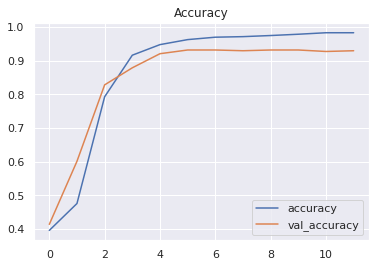

In [50]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [56]:
y_pred = np.argmax(model.predict(X_val), axis=-1)

In [57]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_val, y_pred)

print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[  8   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  35   0   0   0   0   0   2   0   0   0   0   0   0   0]
 [  0   1  14   0   0   0   0   1   0   0   0   0   0   0   1]
 [  0   0   1  17   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  11   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  19   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  25   2   1   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0 182   0   0   3   0   0   0   2]
 [  0   0   0   0   0   0   0   2  24   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   5   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0  29   2   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  12   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   8   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   3   0]
 [  0   0   1   0   0   0   0   5   0   0   0   0   0   0  30]]


<AxesSubplot:>

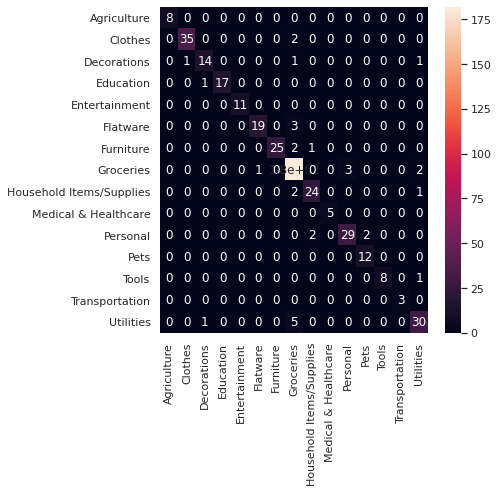

In [60]:
sns.set(rc={'figure.figsize':(6,6)})
sns.heatmap(
    confusion,
    xticklabels=list(class_names),
    yticklabels=list(class_names),
    annot=True
)

### New item prediction

In [61]:
item=corpus[15:16]
item=np.array(["telephone huawei y7 2019"],dtype=object)

r=vectorizer.fit(corpus)
test_pred=r.transform(item).toarray()

model.predict(test_pred)
label_map[np.argmax(model.predict(test_pred), axis=-1)[0]]

'Utilities'